In [85]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import plotly.figure_factory as ff
import plotly.express as px

In [86]:
df = pd.read_csv('games_info.csv')
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK
0,NUKITASHI,Store Genres Adventure (25),review_score 9,4 Languages,Qruppo,Windows,1357,46,NaN,23 June 2023 – 16:51:13 UTC (11 months ago),587\nall-time peak 11 months ago25 June 2023,NaN,NaN,88\n24-hour peak
1,Don't Escape Trilogy,"Store Genres Adventure (25), Indie (23)",review_score 8,1 Languages,scriptwelder,Windows,382,1,Engine.Adobe_AIR,29 July 2019 – 16:04:44 UTC (5 years ago),36\nall-time peak 6 months ago19 November 2023,"4,99€",NaN,3\n24-hour peak
2,Call of Duty 4: Modern Warfare (2007),Store Genres Action (1),review_score 8,5 Languages,Infinity Ward,Windows macOS,21879,1509,"AntiCheat.PunkBuster, Engine.IW_Engine",12 November 2007 – 18:00:00 UTC (17 years ago),"1,796\nall-time peak 14 years ago25 April 2010","19,99€",NaN,535\n24-hour peak
3,Yog-Sothoth's Yard,"Store Genres Indie (23), RPG (3), Simulation (28)",review_score 8,2 Languages,Bone Nail,Windows,7044,412,Engine.Unity,20 October 2023 – 06:50:21 UTC (7 months ago),"5,459\nall-time peak 7 months ago21 October 2023","10,79€",1.0,712\n24-hour peak
4,Sledders,"Store Genres Racing (9), Simulation (28), Spor...",review_score 9,1 Languages,Hanki Games,Windows,1628,61,Engine.Unity,5 December 2023 – 12:00:06 UTC (6 months ago),6 months ago,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tModLoader,"Store Genres Action (1), Adventure (25), Indie...",review_score 9,9 Languages,TML Team,Windows macOS Linux,242725,7360,"Engine.FNA, Engine.XNA, Detected Technologies ...",16 May 2020 – 16:59:23 UTC (4 years ago),"47,602\nall-time peak last month20 April 2024",NaN,NaN,"32,011\n24-hour peak"
62,OMORI,"Store Genres Adventure (25), Indie (23), RPG (3)",review_score 9,4 Languages,"OMOCAT, LLC",Windows macOS,66821,1687,Engine.RPGMaker,25 December 2020 – 08:00:00 UTC (4 years ago),"3,166\nall-time peak 3 years ago13 February 2021",$19.99,NaN,688\n24-hour peak
63,Grimm's Hollow,"Store Genres Adventure (25), Free to Play (37)...",review_score 9,7 Languages,ghosthunter,Windows,12775,174,"Engine.RPGMaker, Detected Technologies (?), En...",30 October 2019 – 22:07:09 UTC (5 years ago),221\nall-time peak 3 years ago29 July 2021,NaN,1.0,21\n24-hour peak
64,Resident Evil 2,Store Genres Action (1),review_score 9,15 Languages,"CAPCOM Co., Ltd.",Windows,149972,4737,Engine.RE_Engine,25 January 2019 – 05:01:00 UTC (5 years ago),"74,227\nall-time peak 5 years ago26 January 2019",$39.99,12.0,"1,430\n24-hour peak"


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   66 non-null     object 
 1   STORE_GENRE            56 non-null     object 
 2   RATING_SCORE           56 non-null     object 
 3   N_SUPPORTED_LANGUAGES  56 non-null     object 
 4   DEVELOPERS             66 non-null     object 
 5   SUPPORTED_PLATFORMS    64 non-null     object 
 6   POSITIVE_REVIEWS       66 non-null     int64  
 7   NEGATIVE_REVIEWS       66 non-null     int64  
 8   TECHNOLOGIES           53 non-null     object 
 9   RELEASE_DATE           66 non-null     object 
 10  TOTAL_TWITCH_PEAK      66 non-null     object 
 11  PRICE                  50 non-null     object 
 12  N_DLC                  26 non-null     float64
 13  24_HOUR_PEAK           53 non-null     object 
dtypes: float64(1), int64(2), object(11)
memory usage: 7.3+ KB


In [88]:
df.describe()

,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,N_DLC
count,6.600000e+01,66.000000,26.000000
mean,1.589803e+05,4297.090909,8.538462
std,2.467782e+05,6712.943939,18.359152
min,3.820000e+02,1.000000,1.000000
25%,1.276750e+04,321.750000,1.250000
50%,7.132050e+04,2289.500000,3.000000
75%,1.767032e+05,4948.500000,7.000000
max,1.257272e+06,34910.000000,94.000000


In [89]:
df.describe(include='object')

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,24_HOUR_PEAK
count,66,56,56,56,66,64,53,66,66,50,53
unique,63,34,2,22,59,4,23,63,61,25,50
top,Slay the Spire,Store Genres Action (1),review_score 9,1 Languages,Valve,Windows macOS Linux,Engine.Unity,23 January 2019 – 15:50:00 UTC (5 years ago),4 years ago,$19.99,"1,065\n24-hour peak"
freq,2,7,48,12,4,26,19,2,3,7,2


In [90]:
df['PUBLISH_YEAR'] = df['RELEASE_DATE'].str.extract(r'(\s\d+)').astype(int)
df = df.drop('RELEASE_DATE', axis=1)

In [91]:
print(df['PUBLISH_YEAR'])

0     2023
1     2019
2     2007
3     2023
4     2023
      ... 
61    2020
62    2020
63    2019
64    2019
65    2021
Name: PUBLISH_YEAR, Length: 66, dtype: int32


In [92]:
df['N_SUPPORTED_LANGUAGES'] = df['N_SUPPORTED_LANGUAGES'].fillna(1)

In [93]:
df['N_SUPPORTED_LANGUAGES'] = df['N_SUPPORTED_LANGUAGES'].astype(str).str.replace(' Languages', '').astype(int)

In [94]:
placeholder_value = 'review_score -1'
df['RATING_SCORE'] = df['RATING_SCORE'].fillna(placeholder_value)  # Fill NaN with placeholder value
df['RATING_SCORE'] = df['RATING_SCORE'].str.replace('review_score ', '').astype(float).astype(int)  # Remove "review_score", convert to float, then to int



In [95]:
# Replace placeholder value with mean of non-placeholder values
mean_rating_score = df.loc[df['RATING_SCORE'] != -1, 'RATING_SCORE'].mean()  # Calculate mean of non-placeholder values
df.loc[df['RATING_SCORE'] == -1, 'RATING_SCORE'] = mean_rating_score  # Replace placeholder values with mean

C:\Users\Hasti\AppData\Local\Temp\ipykernel_13756\3503398213.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.857142857142858' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['RATING_SCORE'] == -1, 'RATING_SCORE'] = mean_rating_score  # Replace placeholder values with mean


In [96]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR
0,NUKITASHI,Store Genres Adventure (25),9.0,4,Qruppo,Windows,1357,46,NaN,587\nall-time peak 11 months ago25 June 2023,NaN,NaN,88\n24-hour peak,2023
1,Don't Escape Trilogy,"Store Genres Adventure (25), Indie (23)",8.0,1,scriptwelder,Windows,382,1,Engine.Adobe_AIR,36\nall-time peak 6 months ago19 November 2023,"4,99€",NaN,3\n24-hour peak,2019
2,Call of Duty 4: Modern Warfare (2007),Store Genres Action (1),8.0,5,Infinity Ward,Windows macOS,21879,1509,"AntiCheat.PunkBuster, Engine.IW_Engine","1,796\nall-time peak 14 years ago25 April 2010","19,99€",NaN,535\n24-hour peak,2007
3,Yog-Sothoth's Yard,"Store Genres Indie (23), RPG (3), Simulation (28)",8.0,2,Bone Nail,Windows,7044,412,Engine.Unity,"5,459\nall-time peak 7 months ago21 October 2023","10,79€",1.0,712\n24-hour peak,2023
4,Sledders,"Store Genres Racing (9), Simulation (28), Spor...",9.0,1,Hanki Games,Windows,1628,61,Engine.Unity,6 months ago,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tModLoader,"Store Genres Action (1), Adventure (25), Indie...",9.0,9,TML Team,Windows macOS Linux,242725,7360,"Engine.FNA, Engine.XNA, Detected Technologies ...","47,602\nall-time peak last month20 April 2024",NaN,NaN,"32,011\n24-hour peak",2020
62,OMORI,"Store Genres Adventure (25), Indie (23), RPG (3)",9.0,4,"OMOCAT, LLC",Windows macOS,66821,1687,Engine.RPGMaker,"3,166\nall-time peak 3 years ago13 February 2021",$19.99,NaN,688\n24-hour peak,2020
63,Grimm's Hollow,"Store Genres Adventure (25), Free to Play (37)...",9.0,7,ghosthunter,Windows,12775,174,"Engine.RPGMaker, Detected Technologies (?), En...",221\nall-time peak 3 years ago29 July 2021,NaN,1.0,21\n24-hour peak,2019
64,Resident Evil 2,Store Genres Action (1),9.0,15,"CAPCOM Co., Ltd.",Windows,149972,4737,Engine.RE_Engine,"74,227\nall-time peak 5 years ago26 January 2019",$39.99,12.0,"1,430\n24-hour peak",2019


In [97]:
# Split the 'SUPPORTED_PLATFORMS' column into separate columns for each platform
platform_dummies = df['SUPPORTED_PLATFORMS'].str.get_dummies(sep=' ')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, platform_dummies], axis=1)

# Drop the original 'SUPPORTED_PLATFORMS' column
df.drop(columns=['SUPPORTED_PLATFORMS'], inplace=True)

df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,NUKITASHI,Store Genres Adventure (25),9.0,4,Qruppo,1357,46,NaN,587\nall-time peak 11 months ago25 June 2023,NaN,NaN,88\n24-hour peak,2023,0,1,0
1,Don't Escape Trilogy,"Store Genres Adventure (25), Indie (23)",8.0,1,scriptwelder,382,1,Engine.Adobe_AIR,36\nall-time peak 6 months ago19 November 2023,"4,99€",NaN,3\n24-hour peak,2019,0,1,0
2,Call of Duty 4: Modern Warfare (2007),Store Genres Action (1),8.0,5,Infinity Ward,21879,1509,"AntiCheat.PunkBuster, Engine.IW_Engine","1,796\nall-time peak 14 years ago25 April 2010","19,99€",NaN,535\n24-hour peak,2007,0,1,1
3,Yog-Sothoth's Yard,"Store Genres Indie (23), RPG (3), Simulation (28)",8.0,2,Bone Nail,7044,412,Engine.Unity,"5,459\nall-time peak 7 months ago21 October 2023","10,79€",1.0,712\n24-hour peak,2023,0,1,0
4,Sledders,"Store Genres Racing (9), Simulation (28), Spor...",9.0,1,Hanki Games,1628,61,Engine.Unity,6 months ago,NaN,NaN,NaN,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tModLoader,"Store Genres Action (1), Adventure (25), Indie...",9.0,9,TML Team,242725,7360,"Engine.FNA, Engine.XNA, Detected Technologies ...","47,602\nall-time peak last month20 April 2024",NaN,NaN,"32,011\n24-hour peak",2020,1,1,1
62,OMORI,"Store Genres Adventure (25), Indie (23), RPG (3)",9.0,4,"OMOCAT, LLC",66821,1687,Engine.RPGMaker,"3,166\nall-time peak 3 years ago13 February 2021",$19.99,NaN,688\n24-hour peak,2020,0,1,1
63,Grimm's Hollow,"Store Genres Adventure (25), Free to Play (37)...",9.0,7,ghosthunter,12775,174,"Engine.RPGMaker, Detected Technologies (?), En...",221\nall-time peak 3 years ago29 July 2021,NaN,1.0,21\n24-hour peak,2019,0,1,0
64,Resident Evil 2,Store Genres Action (1),9.0,15,"CAPCOM Co., Ltd.",149972,4737,Engine.RE_Engine,"74,227\nall-time peak 5 years ago26 January 2019",$39.99,12.0,"1,430\n24-hour peak",2019,0,1,0


In [98]:
price_pattern = r'\$([\d.]+)'

# Extract the price from the "price" column using regex
df['PRICE'] = df['PRICE'].str.extract(price_pattern)

df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,NUKITASHI,Store Genres Adventure (25),9.0,4,Qruppo,1357,46,NaN,587\nall-time peak 11 months ago25 June 2023,NaN,NaN,88\n24-hour peak,2023,0,1,0
1,Don't Escape Trilogy,"Store Genres Adventure (25), Indie (23)",8.0,1,scriptwelder,382,1,Engine.Adobe_AIR,36\nall-time peak 6 months ago19 November 2023,NaN,NaN,3\n24-hour peak,2019,0,1,0
2,Call of Duty 4: Modern Warfare (2007),Store Genres Action (1),8.0,5,Infinity Ward,21879,1509,"AntiCheat.PunkBuster, Engine.IW_Engine","1,796\nall-time peak 14 years ago25 April 2010",NaN,NaN,535\n24-hour peak,2007,0,1,1
3,Yog-Sothoth's Yard,"Store Genres Indie (23), RPG (3), Simulation (28)",8.0,2,Bone Nail,7044,412,Engine.Unity,"5,459\nall-time peak 7 months ago21 October 2023",NaN,1.0,712\n24-hour peak,2023,0,1,0
4,Sledders,"Store Genres Racing (9), Simulation (28), Spor...",9.0,1,Hanki Games,1628,61,Engine.Unity,6 months ago,NaN,NaN,NaN,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tModLoader,"Store Genres Action (1), Adventure (25), Indie...",9.0,9,TML Team,242725,7360,"Engine.FNA, Engine.XNA, Detected Technologies ...","47,602\nall-time peak last month20 April 2024",NaN,NaN,"32,011\n24-hour peak",2020,1,1,1
62,OMORI,"Store Genres Adventure (25), Indie (23), RPG (3)",9.0,4,"OMOCAT, LLC",66821,1687,Engine.RPGMaker,"3,166\nall-time peak 3 years ago13 February 2021",19.99,NaN,688\n24-hour peak,2020,0,1,1
63,Grimm's Hollow,"Store Genres Adventure (25), Free to Play (37)...",9.0,7,ghosthunter,12775,174,"Engine.RPGMaker, Detected Technologies (?), En...",221\nall-time peak 3 years ago29 July 2021,NaN,1.0,21\n24-hour peak,2019,0,1,0
64,Resident Evil 2,Store Genres Action (1),9.0,15,"CAPCOM Co., Ltd.",149972,4737,Engine.RE_Engine,"74,227\nall-time peak 5 years ago26 January 2019",39.99,12.0,"1,430\n24-hour peak",2019,0,1,0


In [99]:
def clean_store_genre(genre_string):
    genres = genre_string.split(', ')
    cleaned_genres = []
    for genre in genres:
        cleaned_genre = genre.split(' (')[0]
        cleaned_genres.append(cleaned_genre)
    return cleaned_genres

df['STORE_GENRE'] = df['STORE_GENRE'].fillna('Store Genres')
df['STORE_GENRE'] = df['STORE_GENRE'].str.replace('Store Genres', '')
df['STORE_GENRE'] = df['STORE_GENRE'].apply(clean_store_genre)


In [100]:
df['24_HOUR_PEAK']

0         88\n24-hour peak
1          3\n24-hour peak
2        535\n24-hour peak
3        712\n24-hour peak
4                      NaN
              ...         
61    32,011\n24-hour peak
62       688\n24-hour peak
63        21\n24-hour peak
64     1,430\n24-hour peak
65        29\n24-hour peak
Name: 24_HOUR_PEAK, Length: 66, dtype: object

In [101]:
df['24_HOUR_PEAK'] = df['24_HOUR_PEAK'].fillna(("0\n24-hour peak"))
df['24_HOUR_PEAK'] = df['24_HOUR_PEAK'].apply(lambda x: int(x.split('\n')[0].replace(',', ''))).astype(int)

In [102]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,NUKITASHI,[ Adventure],9.0,4,Qruppo,1357,46,NaN,587\nall-time peak 11 months ago25 June 2023,NaN,NaN,88,2023,0,1,0
1,Don't Escape Trilogy,"[ Adventure, Indie]",8.0,1,scriptwelder,382,1,Engine.Adobe_AIR,36\nall-time peak 6 months ago19 November 2023,NaN,NaN,3,2019,0,1,0
2,Call of Duty 4: Modern Warfare (2007),[ Action],8.0,5,Infinity Ward,21879,1509,"AntiCheat.PunkBuster, Engine.IW_Engine","1,796\nall-time peak 14 years ago25 April 2010",NaN,NaN,535,2007,0,1,1
3,Yog-Sothoth's Yard,"[ Indie, RPG, Simulation]",8.0,2,Bone Nail,7044,412,Engine.Unity,"5,459\nall-time peak 7 months ago21 October 2023",NaN,1.0,712,2023,0,1,0
4,Sledders,"[ Racing, Simulation, Sports, Early Access]",9.0,1,Hanki Games,1628,61,Engine.Unity,6 months ago,NaN,NaN,0,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tModLoader,"[ Action, Adventure, Indie, RPG, Free to Play]",9.0,9,TML Team,242725,7360,"Engine.FNA, Engine.XNA, Detected Technologies ...","47,602\nall-time peak last month20 April 2024",NaN,NaN,32011,2020,1,1,1
62,OMORI,"[ Adventure, Indie, RPG]",9.0,4,"OMOCAT, LLC",66821,1687,Engine.RPGMaker,"3,166\nall-time peak 3 years ago13 February 2021",19.99,NaN,688,2020,0,1,1
63,Grimm's Hollow,"[ Adventure, Free to Play, Indie, RPG]",9.0,7,ghosthunter,12775,174,"Engine.RPGMaker, Detected Technologies (?), En...",221\nall-time peak 3 years ago29 July 2021,NaN,1.0,21,2019,0,1,0
64,Resident Evil 2,[ Action],9.0,15,"CAPCOM Co., Ltd.",149972,4737,Engine.RE_Engine,"74,227\nall-time peak 5 years ago26 January 2019",39.99,12.0,1430,2019,0,1,0


In [103]:
df['TECHNOLOGIES']

0                                                   NaN
1                                      Engine.Adobe_AIR
2                AntiCheat.PunkBuster, Engine.IW_Engine
3                                          Engine.Unity
4                                          Engine.Unity
                            ...                        
61    Engine.FNA, Engine.XNA, Detected Technologies ...
62                                      Engine.RPGMaker
63    Engine.RPGMaker, Detected Technologies (?), En...
64                                     Engine.RE_Engine
65                                         Engine.Unity
Name: TECHNOLOGIES, Length: 66, dtype: object

In [104]:
df['TECHNOLOGIES'] = df['TECHNOLOGIES'].fillna('')  # Replace NaN with empty string
df['TECHNOLOGIES'] = df['TECHNOLOGIES'].apply(lambda x: x.split(', ') if x else [])

In [105]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,NUKITASHI,[ Adventure],9.0,4,Qruppo,1357,46,[],587\nall-time peak 11 months ago25 June 2023,NaN,NaN,88,2023,0,1,0
1,Don't Escape Trilogy,"[ Adventure, Indie]",8.0,1,scriptwelder,382,1,[Engine.Adobe_AIR],36\nall-time peak 6 months ago19 November 2023,NaN,NaN,3,2019,0,1,0
2,Call of Duty 4: Modern Warfare (2007),[ Action],8.0,5,Infinity Ward,21879,1509,"[AntiCheat.PunkBuster, Engine.IW_Engine]","1,796\nall-time peak 14 years ago25 April 2010",NaN,NaN,535,2007,0,1,1
3,Yog-Sothoth's Yard,"[ Indie, RPG, Simulation]",8.0,2,Bone Nail,7044,412,[Engine.Unity],"5,459\nall-time peak 7 months ago21 October 2023",NaN,1.0,712,2023,0,1,0
4,Sledders,"[ Racing, Simulation, Sports, Early Access]",9.0,1,Hanki Games,1628,61,[Engine.Unity],6 months ago,NaN,NaN,0,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tModLoader,"[ Action, Adventure, Indie, RPG, Free to Play]",9.0,9,TML Team,242725,7360,"[Engine.FNA, Engine.XNA, Detected Technologies...","47,602\nall-time peak last month20 April 2024",NaN,NaN,32011,2020,1,1,1
62,OMORI,"[ Adventure, Indie, RPG]",9.0,4,"OMOCAT, LLC",66821,1687,[Engine.RPGMaker],"3,166\nall-time peak 3 years ago13 February 2021",19.99,NaN,688,2020,0,1,1
63,Grimm's Hollow,"[ Adventure, Free to Play, Indie, RPG]",9.0,7,ghosthunter,12775,174,"[Engine.RPGMaker, Detected Technologies (?), E...",221\nall-time peak 3 years ago29 July 2021,NaN,1.0,21,2019,0,1,0
64,Resident Evil 2,[ Action],9.0,15,"CAPCOM Co., Ltd.",149972,4737,[Engine.RE_Engine],"74,227\nall-time peak 5 years ago26 January 2019",39.99,12.0,1430,2019,0,1,0


In [106]:
df['TOTAL_TWITCH_PEAK']

0         587\nall-time peak 11 months ago25 June 2023
1       36\nall-time peak 6 months ago19 November 2023
2       1,796\nall-time peak 14 years ago25 April 2010
3     5,459\nall-time peak 7 months ago21 October 2023
4                                         6 months ago
                            ...                       
61       47,602\nall-time peak last month20 April 2024
62    3,166\nall-time peak 3 years ago13 February 2021
63          221\nall-time peak 3 years ago29 July 2021
64    74,227\nall-time peak 5 years ago26 January 2019
65      402\nall-time peak 2 years ago10 December 2022
Name: TOTAL_TWITCH_PEAK, Length: 66, dtype: object

In [84]:
df['TWITCH_PEAK_HOUR'] = df['TOTAL_TWITCH_PEAK'].apply(lambda x: x.split('\n')[0].replace(',', '')).astype(int)

df['TWITCH_PEAK_YEAR'] = df['TOTAL_TWITCH_PEAK'].apply(lambda x: x.split()[-1]).astype(int)

df.drop(columns=['TOTAL_TWITCH_PEAK'], inplace=True)

ValueError: invalid literal for int() with base 10: '6 months ago'

In [ ]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS,TWITCH_PEAK_HOUR,TWITCH_PEAK_YEAR
0,HYPERCHARGE: Unboxed,"[ Action, Adventure, Casual, Indie, Strategy]",8,13,Digital Cybercherries,3565,375,[Engine.Unreal],NaN,2.0,132,2020,1,1,0,1641,2022
1,KoboldKare,"[ Casual, Indie, RPG, Simulation]",8,23,Naelstrof,1470,134,[Engine.Unity],14.99,NaN,106,2022,1,1,1,470,2022
2,Devil May Cry 4 Special Edition,[ Action],8,8,"CAPCOM Co., Ltd.",13782,1655,[],24.99,11.0,169,2015,0,1,0,4500,2015
3,Earn to Die 2,"[ Action, Indie, Racing]",8,12,Toffee Games,907,74,[Engine.Marmalade],4.99,NaN,13,2016,0,1,1,179,2016
4,Koa and the Five Pirates of Mara,"[ Adventure, Casual, Indie]",8,11,Chibig,294,15,[Engine.Unreal],19.99,NaN,2,2023,0,1,0,48,2023
5,弾幕アマノジャク 〜 Impossible Spell Card.,"[ Action, Indie]",8,1,上海アリス幻樂団,153,4,[],10.99,NaN,5,2019,0,1,0,18,2019
6,7 Years From Now,"[ Adventure, Indie, RPG]",8,12,fumi,107,1,[Engine.Unity],9.99,NaN,3,2021,0,1,0,7,2021
7,Totally Accurate Battlegrounds,"[ Action, Free to Play, Indie]",8,1,Landfall,74538,9819,"[AntiCheat.EasyAntiCheat, Engine.Unity, SDK.Ep...",NaN,NaN,498,2018,0,1,0,29438,2018
8,Bear and Breakfast,"[ Adventure, Casual, RPG, Simulation]",8,7,Gummy Cat,3876,414,[Engine.Unity],19.99,NaN,98,2022,0,1,0,3027,2022
9,Sugar Sweet Temptation,[ Casual],8,3,Recette,89,0,[Engine.KiriKiri],24.99,NaN,3,2023,0,1,0,26,2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   10 non-null     object 
 1   STORE_GENRE            10 non-null     object 
 2   RATING_SCORE           10 non-null     int32  
 3   N_SUPPORTED_LANGUAGES  10 non-null     int32  
 4   DEVELOPERS             10 non-null     object 
 5   POSITIVE_REVIEWS       10 non-null     int64  
 6   NEGATIVE_REVIEWS       10 non-null     int64  
 7   TECHNOLOGIES           10 non-null     object 
 8   PRICE                  8 non-null      object 
 9   N_DLC                  2 non-null      float64
 10  24_HOUR_PEAK           10 non-null     int64  
 11  PUBLISH_YEAR           10 non-null     int32  
 12  Linux                  10 non-null     int64  
 13  Windows                10 non-null     int64  
 14  macOS                  10 non-null     int64  
 15  TWITCH_PE

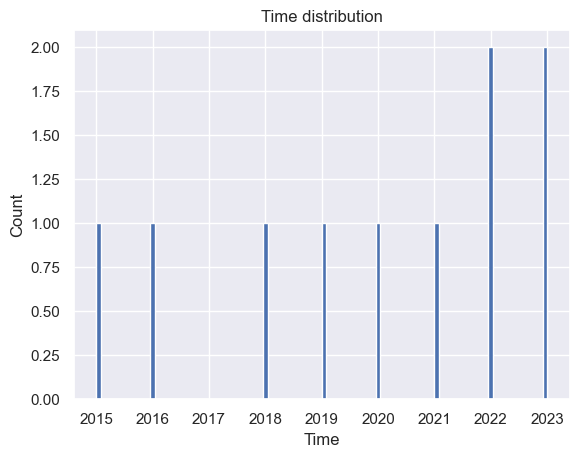

In [ ]:
plt.hist(df['PUBLISH_YEAR'], bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Time distribution')

plt.show()